# importing  libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# loading model

In [4]:
cnn = tf.keras.models.load_model("/content/trained_model.h5")

#visualisation and performing on single image

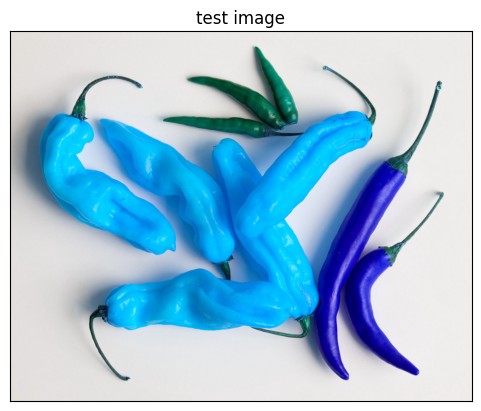

In [5]:
import cv2
image_path = "/content/drive/MyDrive/fruit_vegitable_recognition_system/test/chilli pepper/Image_1.jpg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("test image")
plt.xticks([])
plt.yticks([])
plt.show()

# Testing image

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # converting single image to batch
prediction = cnn.predict(input_arr)

1/1 [==============================] - 0s 253ms/step


In [7]:
print(prediction[0])
print(max(prediction[0]))

[1.0225755e-21 2.0160330e-34 6.7594500e-16 6.9689387e-16 5.0933877e-26
 7.2195264e-19 1.1215552e-21 5.4795240e-32 1.0000000e+00 3.2195696e-28
 3.0980147e-20 2.5912801e-23 5.2609434e-27 6.4137244e-23 6.9326310e-26
 1.5302748e-19 3.9704113e-27 1.6231973e-30 1.8966480e-28 1.2703215e-21
 2.4723860e-19 1.3503769e-24 1.7411690e-17 3.1934320e-27 3.2949928e-26
 6.5517821e-24 5.6847094e-18 9.5018300e-29 3.6209604e-15 3.2754508e-21
 8.7330689e-25 3.8983761e-25 1.0410651e-24 1.1352841e-18 6.7457070e-20
 6.2800964e-26]
1.0


In [8]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_vegitable_recognition_system/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 359 files belonging to 36 classes.


In [9]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [10]:
result_index = np.where(prediction[0] ==max(prediction[0]))
print(result_index[0])

[8]


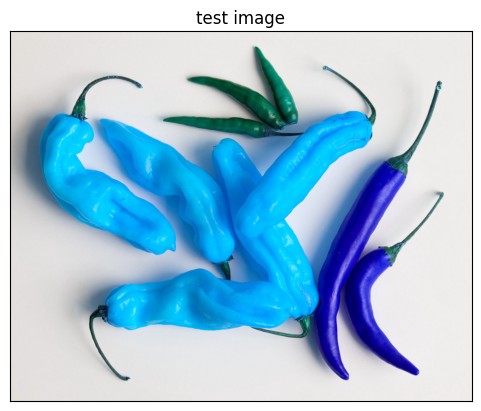

In [11]:
#Display image
plt.imshow(img)
plt.title("test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
#single prediction
print("It is a {}".format(test_set.class_names[result_index[0][0]]))

It is a chilli pepper
